In [18]:
# Install the necessary dependencies

import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython

---
license:
    code: MIT
    content: CC-BY-4.0
github: https://github.com/ocademy-ai/machine-learning
venue: By Ocademy
open_access: true
bibliography:
  - https://raw.githubusercontent.com/ocademy-ai/machine-learning/main/open-machine-learning-jupyter-book/references.bib
---

#  Univariate linear regression

## Introduction

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/ml-regression/Univariate-linear-regression-intro.png
---
name: 'Univariate linear regression infographic'
width: 90%
---
Infographic by [Tavishi](https://medium.com/@tavishi.1402/linear-regression-in-ml-56107a59be03)
:::

Regression is a statistical technique used in machine learning and statistical modeling to analyze the relationship between a dependent variable and one or more independent variables, It aims to find a mathematical equation or model that best represents the relationship between the variables.

## Definition

In the field of machine learning, Linear Regression is one of the fundamental algorithms used for predictive modeling. It is a supervised learning technique that establish a Linear relationship between a dependent variable and one or more independent variables. In this blog post, we will delve into the concept of Linear Regression, its underlying principles, and provide a step-by-step guide to implementing it with code.

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/ml-regression/Univariate-linear-regression-defi.png
---
name: 'Linear regression definition infographic'
width: 90%
---
Infographic by [Tavishi](https://medium.com/@tavishi.1402/linear-regression-in-ml-56107a59be03)
:::

Understanding Linear Regression: Linear Regression is a statistical approach that assumes a linear relationship between the input variables (independent variables) and the output variable (dependent variable). It predicts the value of the dependent variable based on the given set of independent variables. The goal is to find the best-fit line that minimizes the sum of squared errors between the predicted and actual values.

The equation of a simple linear regression model can be represented as: `y = mx + c`

Where:

* `y` is the dependent variable (target variable)
* `x` is the independent variable (input variable)
* `m` is the slope of the line (coefficient)
* `c` is the y-intercept (constant term)

Let's build model using Linear regression.

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable and one or more independent variable x using best fit line. It work on the principle of ordinary least square (OLS)/ Mean square errror (MSE). In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

## Build a simple linear regression

In this section, we will use a dataset containing real-life information about years of work experience and corresponding salaries. We will step-by-step explore the potential relationship between the data and eventually attempt a simple linear regression on it.

## Import some libraries and the dataset.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

salary_dataset = pd.read_csv("https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/Salary_Data.csv")

## Understand the basic information and structure of the dataset.

In [20]:
# It displays the top 5 rows of the data
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
# It provides some information regarding the columns in the data
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [22]:
# It provides basic statistical characteristics of the dataset.
salary_dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Most of the time, it is difficult to identify correlations between data if we merely rely on viewing tables. Therefore, we need to make the dataset more visually intuitive and vivid!

## Visualize the salary dataset.

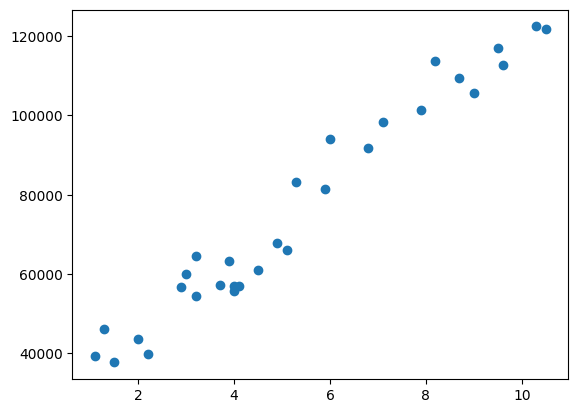

In [23]:
# These Plots help to explain the values and how they are scattered.
year = salary_dataset.YearsExperience
salary = salary_dataset.Salary
plt.scatter(year, salary)
plt.show()

It is obvious that we can fit these scattered points with a straight line. In the next step, we proceed with univariate linear regression.

## Split the dataset into the Training set and Test set.

First, extract the data for years of experience and salary from the dataset separately.

In [24]:
# get a copy of dataset exclude last column
X = salary_dataset.iloc[:, :-1].values

# get array of dataset in column 1st
y = salary_dataset.iloc[:, 1].values


`X` : the first column which contains Years Experience array

`y`: the last column which contains Salary array

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

* `test_size=1/3`: we will split our dataset (30 observations) into 2 parts (training set, test set) and the ratio of **test set** compare to dataset is 1/3 (10 observations) will be put into the **test set**. You can put it 1/2 to get 50% or 0.5, they are the same. We should not let the test set too big; if it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.

* `train_size`: if we use the test_size already, the rest of data will automatically be assigned to `train_size`.

* `random_state`: this is the seed for the random number generator. We can put an instance of the **RandomState** class as well. If we leave it blank or 0, the **RandomState** instance used by **np.random** will be used instead.

## Build the regression model

In [26]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

`regressor = LinearRegression()`: our training model which will implement the Linear Regression.

`regressor.fit`: in this line, we pass the `X_train` which contains value of Year Experience and `y_train` which contains values of particular Salary to form up the model. This is the training process.

In [27]:
# Predicting the Salary for the Test values
y_pred = regressor.predict(X_test)

## Visualize our training model and testing model

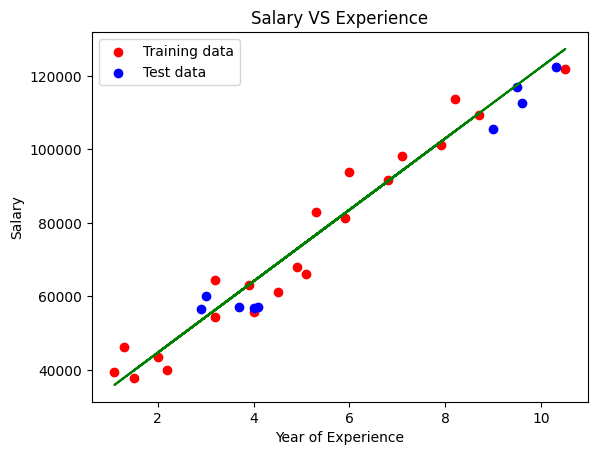

In [28]:
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.legend()  
plt.show()

The linear regression line is generated from the `Training data`. 

The red points in the graph represent the `Training data`, while the blue points represent the `Test data`.

It seems like our trained model performs well accroding to the plot. However, in most cases, it is necessary to quantitatively calculate the extent of error when using this model for predictions.

## Evaluate the model

**Mean square error** (MSE) metrics, which is the mean of all squared differences between expected and predicted values, is a commonly used metric for evaluating model performance in regression problems.

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)

# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)")

Mean error: 3.03e+07 (3.53e+04%)


Another indicator of model quality is `r2_score`, which represents the degree to which the model explains the variance of the target variable. The **R² score** ranges from 0 to 1, where a value closer to 1 indicates a better fit of the model to the data.

In [30]:
score = r2_score(y_test,y_pred)
print("Model determination: ", score)

Model determination:  0.9627668685473266


## Obtain the regression line

In [31]:
# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: 25202.887786154868
Coefficient of the line: [9731.20383825]


## Your turn! 🚀

tbd

## Acknowledgments

Thanks to [Tavishi](https://medium.com/@tavishi.1402) and [Barath](https://www.kaggle.com/vivinbarath) for creating the open-source course [Linear Regression in Machine Learning](https://medium.com/@tavishi.1402/linear-regression-in-ml-56107a59be03) and  [Simple Linear Regression for Salary Data](https://www.kaggle.com/code/vivinbarath/simple-linear-regression-for-salary-data). It inspires the majority of the content in this chapter.
